##  老带新正向负向分析

In [21]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
# 显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
#显示负号
plt.rcParams['axes.unicode_minus'] = False
# 忽略错误
warnings.filterwarnings("ignore")


In [22]:
df = pd.read_csv('老带新口才例子.csv',encoding='gbk')


# 例子情况


## 1. 整体转化 

In [4]:
ratio = len(df[~df['首签支付时间'].isna()])/len(df)
print(f'大盘总体注册转化率为: {ratio*100:3.3f}%')

大盘总体注册转化率为: 8.307%


### 2. 转介绍上级总个数


In [5]:
leads = df['转介绍上级ID'].nunique()
print(f'转介绍上级总例子数 : {leads}')

转介绍上级总例子数 : 13687


### 合并LP信息

In [7]:
ratio = df.groupby('转介绍上级ID')['首签支付时间'].count()/df.groupby('转介绍上级ID')['用户大账号ID'].count()
ratio.name ='转化率'
df_merge = pd.merge(df, ratio, on='转介绍上级ID', how='left')

In [8]:
df_lp = pd.read_csv('LP端例子明细.csv',encoding='gbk')

df_lp = df_lp[['大账号id','lp姓名','lp组别','城市','年龄','新签时间','城市等级']]
df_merge = pd.merge(df_merge,df_lp,left_on='转介绍上级ID',right_on='大账号id',how='left',suffixes=('','df_lp'))

df_merge.to_csv('df_merge.csv')



### 3. 正向例子情况


In [10]:
df_p = df_merge[df_merge['转化率'] >= 0.083]

pleads = len(df_p)/len(df_merge[df_merge['转化率'] > 0])
paleads = len(df_p)/len(df)
positive_leads = df_p['用户大账号ID'].count()
print(f'正向例子占有转化例子比:  {pleads*100:3.3f}%')
print(f'正向例子占所有老带新例子:  {paleads*100:3.3f}%')
print(f'正向例子总带量:  {positive_leads }')

正向例子占有转化例子比:  87.558%
正向例子占所有老带新例子:  25.303%
正向例子总带量:  9120


In [11]:
df_p = df_p.drop_duplicates(subset=['转介绍上级ID'], keep='first')


### 4.负向例子情况
- 转化在0-8.3% 以下的上级数

In [13]:
df_np =  df_merge[(df_merge['转化率'] < 0.083) & (df_merge['转化率'] > 0)]
negative_leads = df_np['用户大账号ID'].count()
print(f'负向例子总带量:  {negative_leads}')
df_np = df_np.drop_duplicates(subset=['转介绍上级ID'], keep='first')
print(f'负向例子上级数 : {len(df_np)}')

负向例子总带量:  1296
负向例子上级数 : 66


## 5. 无转化例子情况

In [15]:
df_0 =  df_merge[df_merge['转化率'] ==0]
zero_leads = df_0['用户大账号ID'].count()
print(f'无转化例子总带量:  {zero_leads}')
zero_inviter =len(df_0.drop_duplicates(subset=['转介绍上级ID']))
print(f'无转化例子上级数 {zero_inviter}')

无转化例子总带量:  25316
无转化例子上级数 11211


In [16]:

df_0 = df_0.drop_duplicates(subset=['转介绍上级ID'], keep='first')


## 对正向例子进行可视化分析


### 1. 正向例子的年龄分布

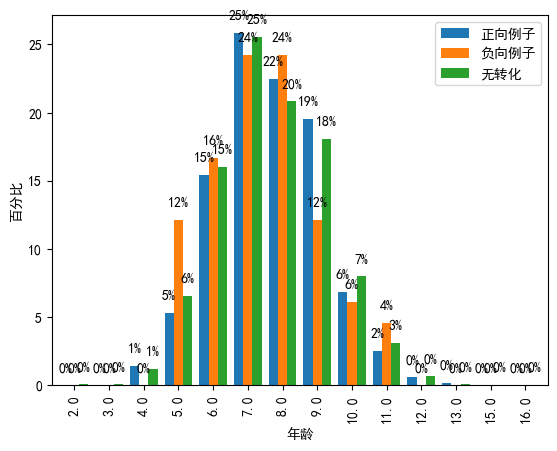

<Figure size 2500x500 with 0 Axes>

In [17]:
df_p_count = df_p['年龄df_lp'].value_counts(normalize=True)*100
df_np_count = df_np['年龄df_lp'].value_counts(normalize=True)*100
df_0_count = df_0['年龄df_lp'].value_counts(normalize=True)*100
df = pd.DataFrame({'正向例子': df_p_count, '负向例子': df_np_count,'无转化': df_0_count})

ax = df.plot(kind='bar', width=0.8)
plt.figure(figsize =(25,5))
for p in ax.patches:
    h = p.get_height()
    x = p.get_x() + p.get_width()/2
    y = h + 1
    text = str(int(h)) + '%' 
    ax.text(x, y, text, ha='center') 
    
ax.set_ylabel('百分比')
ax.set_xlabel('年龄')
plt.show()


### 2. 城市等级分布

<Figure size 1700x500 with 0 Axes>

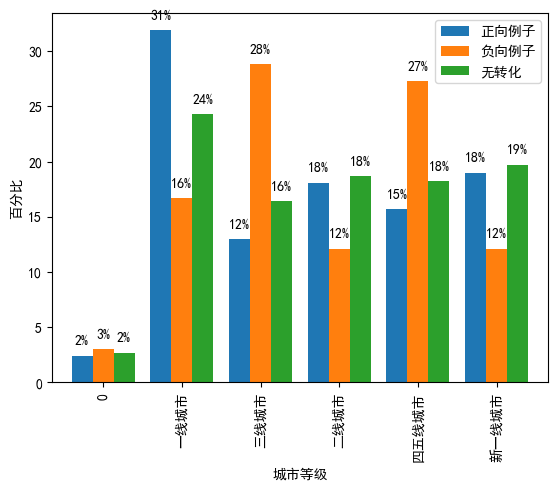

In [20]:
df_p_count = df_p['城市等级df_lp'].value_counts(normalize=True)*100
df_np_count = df_np['城市等级df_lp'].value_counts(normalize=True)*100
df_0_count= df_0['城市等级df_lp'].value_counts(normalize=True)*100
df = pd.DataFrame({'正向例子': df_p_count, '负向例子': df_np_count,'无转化':df_0_count})
plt.figure(figsize=(17,5))
ax = df.plot(kind='bar', width=0.8)

for p in ax.patches:
    h = p.get_height()
    x = p.get_x() + p.get_width()/2
    y = h + 1
    text = str(int(h)) + '%' 
    ax.text(x, y, text, ha='center') 
    
ax.set_ylabel('百分比')
ax.set_xlabel('城市等级')

plt.show()


### 3. 总体城市分布

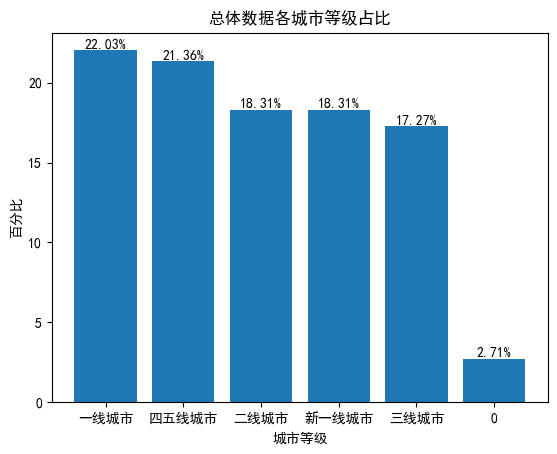

In [18]:
df_0_city_ratio = df_merge['城市等级df_lp'].value_counts(normalize=True)*100

plt.bar(df_0_city_ratio.index, df_0_city_ratio.values)

for x, y in enumerate(df_0_city_ratio.values): 
    plt.text(x, y+0.1, '{:.2f}%'.format(y), ha='center')

plt.xlabel('城市等级')  
plt.ylabel('百分比')
plt.title('总体数据各城市等级占比')

plt.show()




### 4. 总体年龄分布

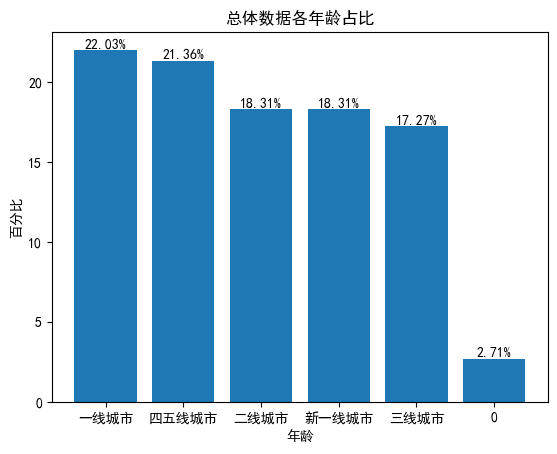

In [19]:
df_0_age_ratio = df_merge['年龄df_lp'].value_counts(normalize=True)*100

plt.bar(df_0_city_ratio.index, df_0_city_ratio.values)
for x, y in enumerate(df_0_city_ratio.values): 
    plt.text(x, y+0.1, '{:.2f}%'.format(y), ha='center')

plt.xlabel('年龄') 
plt.ylabel('百分比')
plt.title('总体数据各年龄占比')

plt.show()